In [38]:
import pandas as pd
import seaborn as sns

# Fase 2:
1. Criar um Jupyter Notebook para iniciar a exploração dos conjuntos de
dados
2. No notebook, calcular medidas de centralidade e dispersão das variáveis
disponíveis
3. No notebook, criar boxplots para as variáveis disponíveis

In [39]:
drugs_df = pd.read_csv('datasets/Drug_Consumption.csv')
drugs_df.head(5)

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0


#### Informações do dataset:
- ID: is a number of records in an original database. Cannot be related to the participant. It can be used for reference only.
- Age (Real) is the age of participant
- Gender: Male or Female
- Education: level of education of participant
- Country: country of origin of the participant
- Ethnicity: ethnicity of participant
- Nscore (Real) is NEO-FFI-R Neuroticism
- Escore (Real) is NEO-FFI-R Extraversion
- Oscore (Real) is NEO-FFI-R Openness to experience.
- Ascore (Real) is NEO-FFI-R Agreeableness.
- Cscore (Real) is NEO-FFI-R Conscientiousness.
- Impulsive (Real) is impulsiveness measured by BIS-11
- SS (Real) is sensation seeing measured by ImpSS
- Alcohol: alcohol consumption
- Amphet: amphetamines consumption
- Amyl: nitrite consumption
- Benzos: benzodiazepine consumption
- Caff: caffeine consumption
- Cannabis: marijuana consumption
- Choc: chocolate consumption
- Coke: cocaine consumption
- Crack: crack cocaine consumption
- Ecstasy: ecstasy consumption
- Heroin: heroin consumption
- Ketamine: ketamine consumption
- Legalh: legal highs consumption
- LSD: LSD consumption
- Meth: methadone consumption
- Mushroom: magic mushroom consumption
- Nicotine: nicotine consumption
- Semer: class of fictitious drug Semeron consumption (i.e. control)
- VSA: class of volatile substance abuse consumption
##### Rating's for Drug Use:

- CL0 Never Used
- CL1 Used over a Decade Ago
- CL2 Used in Last Decade
- CL3 Used in Last Year 59
- CL4 Used in Last Month
- CL5 Used in Last Week
- CL6 Used in Last Day

In [40]:
#função para realizar a analise exploratoria dos dados
def infos(data, info = '', describe = True, means = [], fraction = True):

    #Cria um data frame com a informacao solicitada e sua frequencia
    df = data[info].value_counts().reset_index()
    df.rename(columns = {'index' : info, info : 'Count'}, inplace = True)
    
    if fraction:#Fraction retorna uma coluna no data frame com a porcentagem das frequencias
        fractions = (((df['Count'])*100)/(data[info].describe()['count']))
        df['Fraction(%)'] = round(fractions, 2)
    
    if (means != []):#means retorna o significado de cada linha do dataframe
        a = pd.Series(means)
        df['Meaning'] = a

    if describe: #realiza a função describe do pandas
        print('Describe:')
        print(data[info].describe())
    
    print(df)

In [41]:
infos(drugs_df, info='Age')

Describe:
count      1884
unique        6
top       18-24
freq        643
Name: Age, dtype: object
     Age  Count  Fraction(%)
0  18-24    643        34.13
1  25-34    481        25.53
2  35-44    355        18.84
3  45-54    294        15.61
4  55-64     93         4.94
5    65+     18         0.96


In [42]:
drugs_df['Age'].value_counts().index

Index(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], dtype='object')

In [43]:
infos(drugs_df, info='Gender')

Describe:
count     1884
unique       2
top          M
freq       943
Name: Gender, dtype: object
  Gender  Count  Fraction(%)
0      M    943        50.05
1      F    941        49.95


In [44]:
infos(drugs_df, info='Education')

Describe:
count                                                  1884
unique                                                    9
top       Some college or university, no certificate or ...
freq                                                    506
Name: Education, dtype: object
                                           Education  Count  Fraction(%)
0  Some college or university, no certificate or ...    506        26.86
1                                  University degree    480        25.48
2                                     Masters degree    283        15.02
3                  Professional certificate/ diploma    269        14.28
4                            Left school at 18 years    100         5.31
5                            Left school at 16 years     99         5.25
6                                   Doctorate degree     89         4.72
7                            Left school at 17 years     30         1.59
8                        Left school before 16 years     28   

In [45]:
infos(drugs_df, info='Country')

Describe:
count     1884
unique       7
top         UK
freq      1043
Name: Country, dtype: object
               Country  Count  Fraction(%)
0                   UK   1043        55.36
1                  USA    557        29.56
2                Other    118         6.26
3               Canada     87         4.62
4            Australia     54         2.87
5  Republic of Ireland     20         1.06
6          New Zealand      5         0.27


In [46]:
infos(drugs_df, info='Ethnicity')

Describe:
count      1884
unique        7
top       White
freq       1720
Name: Ethnicity, dtype: object
           Ethnicity  Count  Fraction(%)
0              White   1720        91.30
1              Other     63         3.34
2              Black     33         1.75
3              Asian     26         1.38
4  Mixed-White/Black     20         1.06
5  Mixed-White/Asian     19         1.01
6  Mixed-Black/Asian      3         0.16


In [47]:
#Criação de dataset auxiliar contendo as informações do uso de diversas drogas
drugs_df_drugs = drugs_df.loc[:, "Alcohol":"VSA"]
drugs_df_drugs.head(5)

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
1,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
2,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
3,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
4,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0,0


In [48]:
infos(drugs_df_drugs, info='Alcohol')

Describe:
count    1884.00000
mean        4.63482
std         1.33158
min         0.00000
25%         4.00000
50%         5.00000
75%         6.00000
max         6.00000
Name: Alcohol, dtype: float64
   Alcohol  Count  Fraction(%)
0        5    758        40.23
1        6    505        26.80
2        4    287        15.23
3        3    198        10.51
4        2     68         3.61
5        1     34         1.80
6        0     34         1.80


In [49]:
infos(drugs_df_drugs, info='Amphet')

Describe:
count    1884.000000
mean        1.340234
std         1.783995
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: Amphet, dtype: float64
   Amphet  Count  Fraction(%)
0       0    976        51.80
1       2    242        12.85
2       1    230        12.21
3       3    198        10.51
4       6    102         5.41
5       4     75         3.98
6       5     61         3.24


In [50]:
infos(drugs_df_drugs, info='Amyl')

Describe:
count    1884.000000
mean        0.607219
std         1.064400
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: Amyl, dtype: float64
   Amyl  Count  Fraction(%)
0     0   1304        69.21
1     2    237        12.58
2     1    210        11.15
3     3     92         4.88
4     4     24         1.27
5     5     14         0.74
6     6      3         0.16


In [51]:
infos(drugs_df_drugs, info='Benzos')

Describe:
count    1884.000000
mean        1.464968
std         1.867730
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         6.000000
Name: Benzos, dtype: float64
   Benzos  Count  Fraction(%)
0       0   1000        53.08
1       3    236        12.53
2       2    233        12.37
3       4    120         6.37
4       1    116         6.16
5       6     95         5.04
6       5     84         4.46


In [52]:
infos(drugs_df_drugs, info='Caff')

Describe:
count    1884.000000
mean        5.483546
std         1.114880
min         0.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Caff, dtype: float64
   Caff  Count  Fraction(%)
0     6   1384        73.46
1     5    273        14.49
2     4    106         5.63
3     3     60         3.18
4     0     27         1.43
5     2     24         1.27
6     1     10         0.53


In [53]:
infos(drugs_df_drugs, info='Cannabis')

Describe:
count    1884.000000
mean        2.990977
std         2.287007
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: Cannabis, dtype: float64
   Cannabis  Count  Fraction(%)
0         6    463        24.58
1         0    412        21.87
2         2    266        14.12
3         3    211        11.20
4         1    207        10.99
5         5    185         9.82
6         4    140         7.43


In [54]:
infos(drugs_df_drugs, info='Choc')

Describe:
count    1884.000000
mean        5.106688
std         1.089601
min         0.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: Choc, dtype: float64
   Choc  Count  Fraction(%)
0     6    807        42.83
1     5    682        36.20
2     4    296        15.71
3     3     54         2.87
4     0     32         1.70
5     2     10         0.53
6     1      3         0.16


In [55]:
infos(drugs_df_drugs, info='Coke')

Describe:
count    1884.000000
mean        1.161890
std         1.513196
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: Coke, dtype: float64
   Coke  Count  Fraction(%)
0     0   1037        55.04
1     2    270        14.33
2     3    258        13.69
3     1    160         8.49
4     4     99         5.25
5     5     41         2.18
6     6     19         1.01


In [56]:
infos(drugs_df_drugs, info='Crack')

Describe:
count    1884.000000
mean        0.297771
std         0.837247
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Crack, dtype: float64
   Crack  Count  Fraction(%)
0      0   1626        86.31
1      2    112         5.94
2      1     67         3.56
3      3     59         3.13
4      5      9         0.48
5      4      9         0.48
6      6      2         0.11


In [57]:
infos(drugs_df_drugs, info='Ecstasy')

Describe:
count    1884.000000
mean        1.314756
std         1.647726
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         6.000000
Name: Ecstasy, dtype: float64
   Ecstasy  Count  Fraction(%)
0        0   1020        54.14
1        3    277        14.70
2        2    234        12.42
3        4    156         8.28
4        1    113         6.00
5        5     63         3.34
6        6     21         1.11


In [58]:
infos(drugs_df_drugs, info='Heroin')

Describe:
count    1884.000000
mean        0.374204
std         1.035018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Heroin, dtype: float64
   Heroin  Count  Fraction(%)
0       0   1604        85.14
1       2     94         4.99
2       1     68         3.61
3       3     65         3.45
4       4     24         1.27
5       5     16         0.85
6       6     13         0.69


In [59]:
infos(drugs_df_drugs, info='Ketamine')

Describe:
count    1884.000000
mean        0.569533
std         1.220269
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Ketamine, dtype: float64
   Ketamine  Count  Fraction(%)
0         0   1489        79.03
1         2    142         7.54
2         3    129         6.85
3         1     45         2.39
4         4     42         2.23
5         5     33         1.75
6         6      4         0.21


In [60]:
infos(drugs_df_drugs, info='Legalh')

Describe:
count    1884.000000
mean        1.356688
std         1.789849
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         6.000000
Name: Legalh, dtype: float64
   Legalh  Count  Fraction(%)
0       0   1093        58.01
1       3    323        17.14
2       2    198        10.51
3       4    110         5.84
4       6     67         3.56
5       5     64         3.40
6       1     29         1.54


In [61]:
infos(drugs_df_drugs, info='LSD')

Describe:
count    1884.000000
mean        1.062102
std         1.491298
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: LSD, dtype: float64
   LSD  Count  Fraction(%)
0    0   1068        56.69
1    1    259        13.75
2    3    214        11.36
3    2    177         9.39
4    4     97         5.15
5    5     56         2.97
6    6     13         0.69


In [62]:
infos(drugs_df_drugs, info='Meth')

Describe:
count    1884.000000
mean        0.826964
std         1.646959
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Meth, dtype: float64
   Meth  Count  Fraction(%)
0     0   1428        75.80
1     3    149         7.91
2     2     97         5.15
3     6     73         3.87
4     4     50         2.65
5     5     48         2.55
6     1     39         2.07


In [63]:
infos(drugs_df_drugs, info='Mushrooms')

Describe:
count    1884.000000
mean        1.187898
std         1.466475
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: Mushrooms, dtype: float64
   Mushrooms  Count  Fraction(%)
0          0    981        52.07
1          3    275        14.60
2          2    260        13.80
3          1    209        11.09
4          4    115         6.10
5          5     40         2.12
6          6      4         0.21


In [64]:
infos(drugs_df_drugs, info='Nicotine')

Describe:
count    1884.000000
mean        3.201168
std         2.414415
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max         6.000000
Name: Nicotine, dtype: float64
   Nicotine  Count  Fraction(%)
0         6    610        32.38
1         0    428        22.72
2         2    203        10.77
3         1    193        10.24
4         3    185         9.82
5         5    157         8.33
6         4    108         5.73


In [65]:
drugs_df_quant = pd.read_csv('datasets/Drug_Consumption_Quantified.csv')
drugs_df_quant

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [66]:
infos(drugs_df_quant, info='Age')

Describe:
count    1884.000000
mean        0.034364
std         0.878529
min        -0.951970
25%        -0.951970
50%        -0.078540
75%         0.497880
max         2.591710
Name: Age, dtype: float64
       Age  Count  Fraction(%)
0 -0.95197    643        34.13
1 -0.07854    481        25.53
2  0.49788    355        18.84
3  1.09449    294        15.61
4  1.82213     93         4.94
5  2.59171     18         0.96


In [67]:
infos(drugs_df_quant, 'Age', means=['18-24', '25-34', '35-44', '45-54', '55-64','65+'])

Describe:
count    1884.000000
mean        0.034364
std         0.878529
min        -0.951970
25%        -0.951970
50%        -0.078540
75%         0.497880
max         2.591710
Name: Age, dtype: float64
       Age  Count  Fraction(%) Meaning
0 -0.95197    643        34.13   18-24
1 -0.07854    481        25.53   25-34
2  0.49788    355        18.84   35-44
3  1.09449    294        15.61   45-54
4  1.82213     93         4.94   55-64
5  2.59171     18         0.96     65+


In [68]:
drugs_df_quant

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


<AxesSubplot:ylabel='Age'>

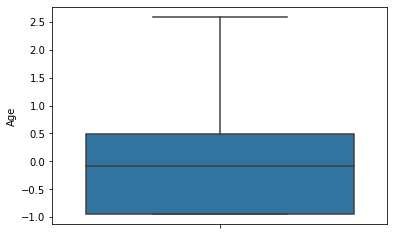

In [82]:
sns.boxplot(y = drugs_df_quant['Age'])

<AxesSubplot:ylabel='Age'>

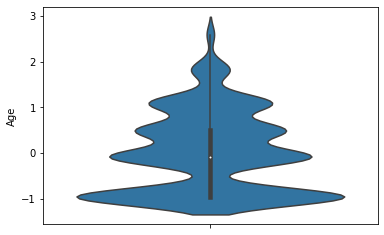

In [81]:
sns.violinplot(y = drugs_df_quant['Age'])

<AxesSubplot:ylabel='Gender'>

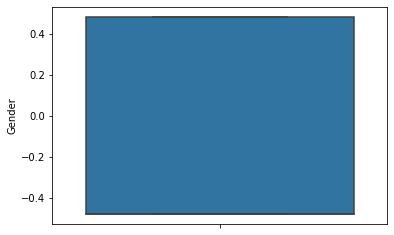

In [70]:
sns.boxplot(y = drugs_df_quant['Gender'])

<AxesSubplot:ylabel='Education'>

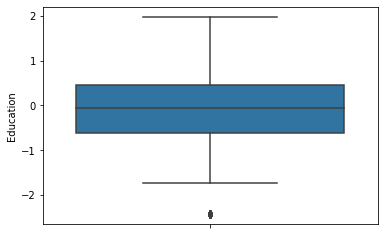

In [71]:
sns.boxplot(y = drugs_df_quant['Education'])

<AxesSubplot:ylabel='Country'>

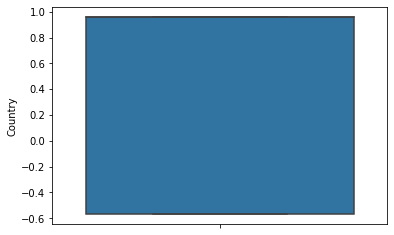

In [72]:
sns.boxplot(y = drugs_df_quant['Country'])

<AxesSubplot:ylabel='Ethnicity'>

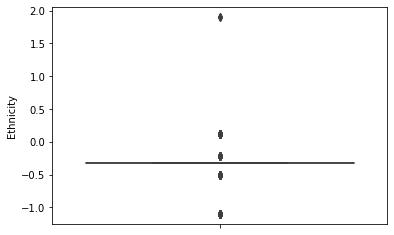

In [73]:
sns.boxplot(y = drugs_df_quant['Ethnicity'])

In [74]:
infos(data=drugs_df_quant, info='Ethnicity', means=list(drugs_df['Ethnicity'].value_counts().index))


Describe:
count    1884.000000
mean       -0.309808
std         0.165967
min        -1.107020
25%        -0.316850
50%        -0.316850
75%        -0.316850
max         1.907250
Name: Ethnicity, dtype: float64
   Ethnicity  Count  Fraction(%)            Meaning
0   -0.31685   1720        91.30              White
1    0.11440     63         3.34              Other
2   -1.10702     33         1.75              Black
3   -0.50212     26         1.38              Asian
4   -0.22166     20         1.06  Mixed-White/Black
5    0.12600     19         1.01  Mixed-White/Asian
6    1.90725      3         0.16  Mixed-Black/Asian


<AxesSubplot:ylabel='Ethnicity'>

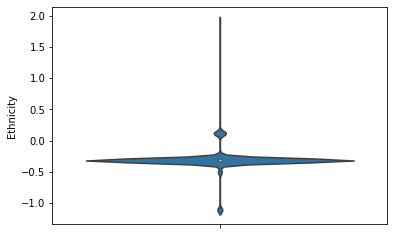

In [75]:
sns.violinplot(y = drugs_df_quant['Ethnicity'])

In [76]:
def mude(data, tipo, lista):
    for i in data.columns:
        if ((type(data[i][0])) == tipo):
            data[i] = data[i].map(lista)
    return data

In [77]:
drugs_df_quant = mude(data = drugs_df_quant, tipo = str, lista = {'CL0' : 0,'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6})
drugs_df_drugs = mude(data = drugs_df_drugs, tipo = str, lista = {'CL0' : 0,'CL1' : 1, 'CL2' : 2, 'CL3' : 3, 'CL4' : 4, 'CL5' : 5, 'CL6' : 6})


In [78]:
for i in drugs_df_drugs.columns:
    drugs_df[i] = drugs_df_drugs[i]
drugs_df

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


In [79]:
drugs_df

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


In [80]:
#Salvando os datasets limpos
drugs_df = drugs_df.drop(columns=['Unnamed: 0.1'])
drugs_df = drugs_df.drop(columns=['Unnamed: 0'])
drugs_df_quant.to_csv("datasets/DrugsDatasetQuant.csv")
drugs_df.to_csv("datasets/Drug_Consumption.csv")

KeyError: "['Unnamed: 0.1'] not found in axis"

<AxesSubplot:ylabel='Alcohol'>

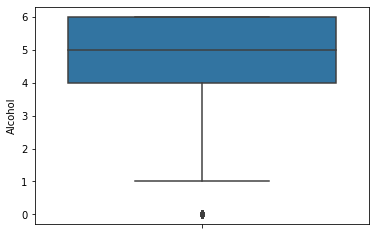

In [ ]:
sns.boxplot(y = drugs_df_quant['Alcohol'])

<AxesSubplot:ylabel='Amphet'>

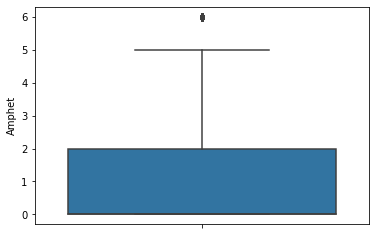

In [ ]:
sns.boxplot(y = drugs_df_quant['Amphet'])

<AxesSubplot:ylabel='Amyl'>

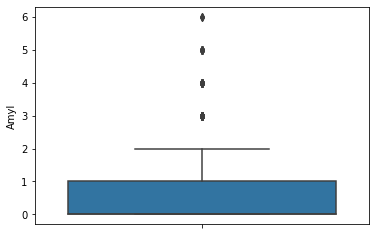

In [ ]:
sns.boxplot(y = drugs_df_quant['Amyl'])

<AxesSubplot:ylabel='Amyl'>

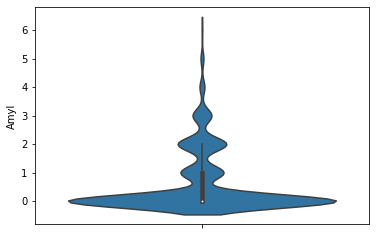

In [ ]:
sns.violinplot(y = drugs_df_quant['Amyl'])

<AxesSubplot:ylabel='Benzos'>

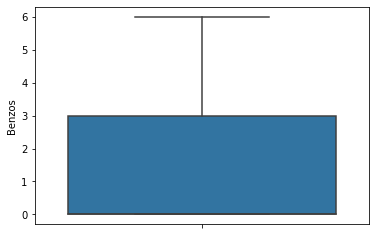

In [ ]:
sns.boxplot(y = drugs_df_quant['Benzos'])

<AxesSubplot:ylabel='Caff'>

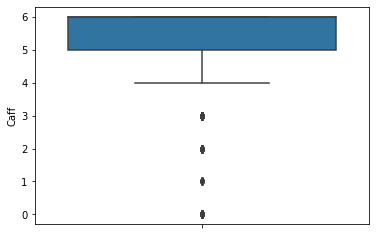

In [ ]:
sns.boxplot(y = drugs_df_quant['Caff'])

<AxesSubplot:ylabel='Caff'>

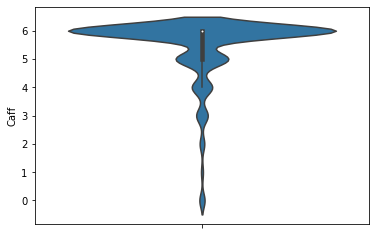

In [ ]:
sns.violinplot(y = drugs_df_quant['Caff'])

<AxesSubplot:ylabel='Cannabis'>

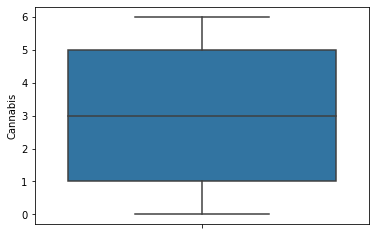

In [ ]:
sns.boxplot(y = drugs_df_quant['Cannabis'])

<AxesSubplot:ylabel='Choc'>

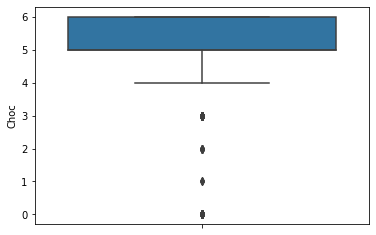

In [ ]:
sns.boxplot(y = drugs_df_quant['Choc'])

<AxesSubplot:ylabel='Choc'>

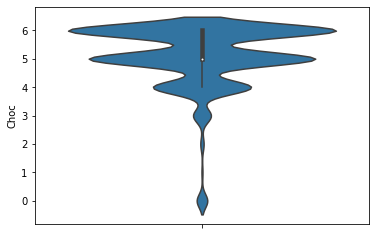

In [ ]:
sns.violinplot(y = drugs_df_quant['Choc'])

<AxesSubplot:ylabel='Crack'>

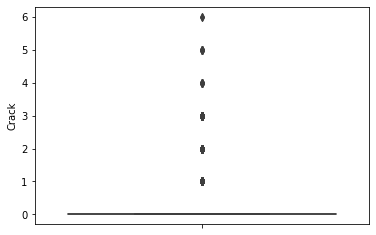

In [ ]:
sns.boxplot(y = drugs_df_quant['Crack'])

<AxesSubplot:ylabel='Crack'>

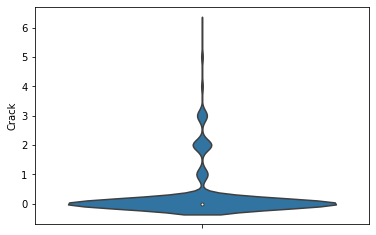

In [ ]:
sns.violinplot(y = drugs_df_quant['Crack'])

<AxesSubplot:ylabel='Ecstasy'>

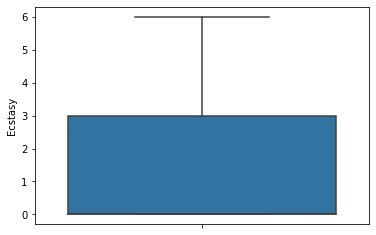

In [ ]:
sns.boxplot(y = drugs_df_quant['Ecstasy'])

<AxesSubplot:ylabel='Heroin'>

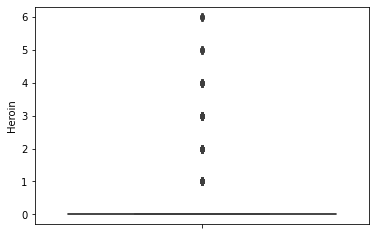

In [ ]:
sns.boxplot(y = drugs_df_quant['Heroin'])

<AxesSubplot:ylabel='Heroin'>

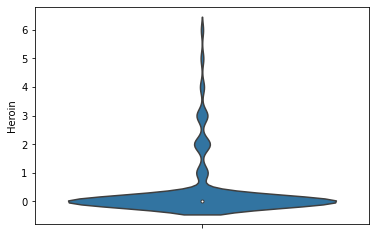

In [ ]:
sns.violinplot(y = drugs_df_quant['Heroin'])

<AxesSubplot:ylabel='Ketamine'>

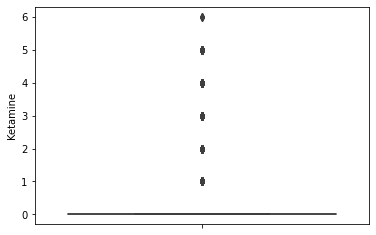

In [ ]:
sns.boxplot(y = drugs_df_quant['Ketamine'])

<AxesSubplot:ylabel='Ketamine'>

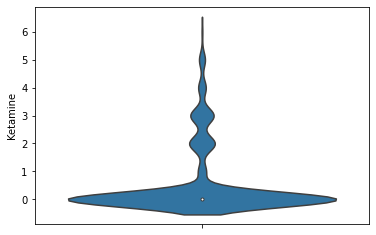

In [ ]:
sns.violinplot(y = drugs_df_quant['Ketamine'])

<AxesSubplot:ylabel='Legalh'>

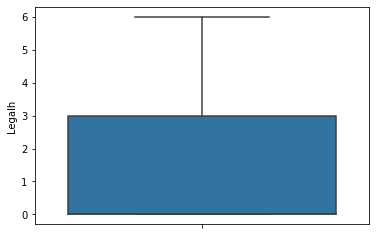

In [ ]:
sns.boxplot(y = drugs_df_quant['Legalh'])

<AxesSubplot:ylabel='LSD'>

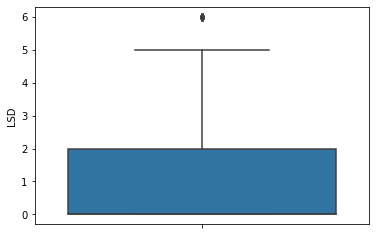

In [ ]:
sns.boxplot(y = drugs_df_quant['LSD'])

<AxesSubplot:ylabel='Meth'>

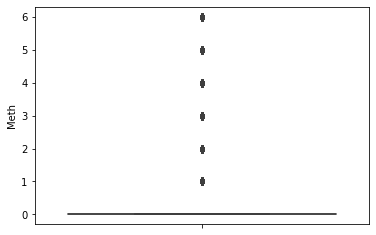

In [ ]:
sns.boxplot(y = drugs_df_quant['Meth'])

<AxesSubplot:ylabel='Meth'>

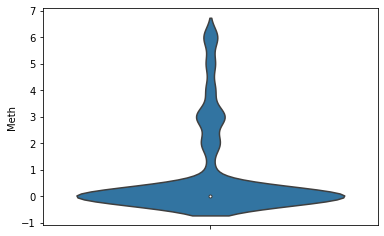

In [ ]:
sns.violinplot(y = drugs_df_quant['Meth'])

<AxesSubplot:ylabel='Mushrooms'>

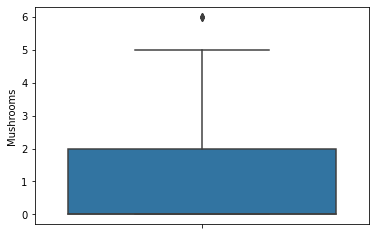

In [ ]:
sns.boxplot(y = drugs_df_quant['Mushrooms'])

<AxesSubplot:ylabel='Nicotine'>

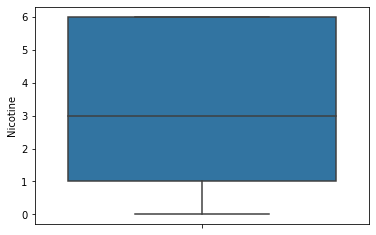

In [ ]:
sns.boxplot(y = drugs_df_quant['Nicotine'])

In [ ]:
drugs_df_quant

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [ ]:
drugs_df

,Unnamed: 0.1,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,...,4,0,2,0,2,3,0,4,0,0
1,1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,...,0,0,0,0,0,0,1,0,0,0
2,2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,...,0,0,2,0,0,0,0,2,0,0
3,3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,...,1,0,0,1,0,0,2,2,0,0
4,4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,...,3,0,0,3,3,0,3,4,0,0
